## 라이브러리 호출

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools


In [2]:
# json 불러오기
file_path = "../chunker/grandeur_Owner's_Manual_pdfminer_chunks.json"
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

grandeur = pd.DataFrame(data)

# 결과 확인
print(grandeur.head())


                                                text      type source_pages  \
0  안전 및 차량 손상 경고\n본 취급설명서에는 고객 및 차량의 안전을 위해 유의해야 ...                    [1]   
1                                          선택 또는 미장착  subtitle          [1]   
2    사양표시\n고객님의 차량에 장착되지 않는 사양에 대한 설명이 포함될 수 있습\n니다.  subtitle          [1]   
3                                        내용 찾기 방법 설명     title          [2]   
4                              내용으로 찾을 때\n목차를 활용하세요.  subtitle          [2]   

  model  
0   그랜저  
1   그랜저  
2   그랜저  
3   그랜저  
4   그랜저  


In [3]:
# 전체 행/열 수와 결측치 등 기본 정보
grandeur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          562 non-null    object
 1   type          562 non-null    object
 2   source_pages  562 non-null    object
 3   model         562 non-null    object
dtypes: object(4)
memory usage: 17.7+ KB


In [4]:
print(grandeur['type'].value_counts())
print("-"*50)
print(grandeur['source_pages'].value_counts())
print("-"*50)
print(grandeur['model'].value_counts())
print("-"*50)


type
title       382
subtitle    179
              1
Name: count, dtype: int64
--------------------------------------------------
source_pages
[5]           19
[3]            6
[39]           5
[40]           4
[37]           4
              ..
[723, 724]     1
[725, 726]     1
[728, 727]     1
[729, 730]     1
[681, 682]     1
Name: count, Length: 514, dtype: int64
--------------------------------------------------
model
그랜저    562
Name: count, dtype: int64
--------------------------------------------------


## 빈도기반 분석

In [5]:
from konlpy.tag import Okt
from collections import Counter
import itertools

# 1. Okt 형태소 분석기 초기화
okt = Okt()

# 2. 텍스트 데이터
grandeur_texts = grandeur['text'].tolist()

# 3. 각 문장을 형태소 분석하여 단어 단위로 나누기
grandeur_tokenized = [okt.nouns(text) for text in grandeur_texts]  # 명사 추출

# 불용어 처리 
stopwords = ['수', '를', '고', '이', '경', '주', '중', '시오', '의', '후', '시', '수', 
             '등', '때', '및', '경우','로']

# 4. 불용어 제거
grandeur_filtered_tokens = [
    [word for word in sentence if word not in stopwords] for sentence in grandeur_tokenized
]

# 5. 단어 빈도 집계 (불용어 제거 후 단어 리스트 사용)
grandeur_flat_tokens = list(itertools.chain.from_iterable(grandeur_filtered_tokens))  # 리스트 평탄화
grandeur_word_freq = Counter(grandeur_flat_tokens)


# 6. 상위 50개 단어 출력
grandeur_top_n = 50
grandeur_top_words = grandeur_word_freq.most_common(grandeur_top_n)

# 출력
for word, freq in grandeur_top_words:
    print(f'{word}: {freq}')



차량: 1588
작동: 1384
주행: 1039
상태: 996
보조: 956
시동: 812
기능: 808
표시: 767
설정: 693
도어: 664
사용: 629
버튼: 602
경고: 595
시스템: 580
주차: 549
장치: 538
점검: 509
전방: 507
키: 489
브레이크: 486
스마트: 483
타이어: 481
충돌: 470
속도: 456
운전자: 451
자동: 447
운전: 445
좌석: 432
해제: 424
안전: 423
엔진: 413
방지: 403
주의: 400
센서: 377
이상: 369
조절: 361
차: 349
석: 346
고등: 345
확인: 325
위치: 324
차로: 309
휠: 301
클러스터: 300
에어백: 300
유리창: 287
다음: 283
제어: 282
트렁크: 279
인식: 279


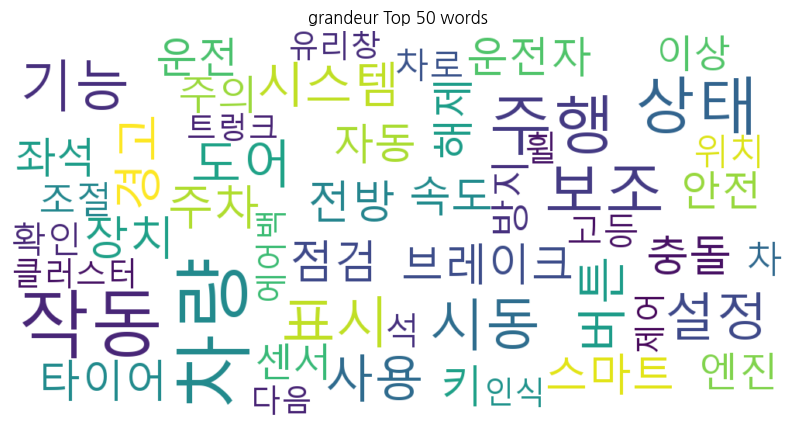

In [6]:
from wordcloud import WordCloud
# 1. top_words를 dict 형태로 변환
grandeur_top_words_dict = dict(grandeur_top_words)

# 2. 워드 클라우드 시각화
grandeur_wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      font_path='C:/Windows/Fonts/malgun.ttf', 
                      max_font_size=100,  # 글자 크기 제한
                      min_font_size=20,   # 최소 글자 크기
                      prefer_horizontal=0.9).generate_from_frequencies(grandeur_top_words_dict)

# 3. 시각화 출력
plt.figure(figsize=(10, 6))
plt.imshow(grandeur_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("grandeur Top 50 words")
plt.show()

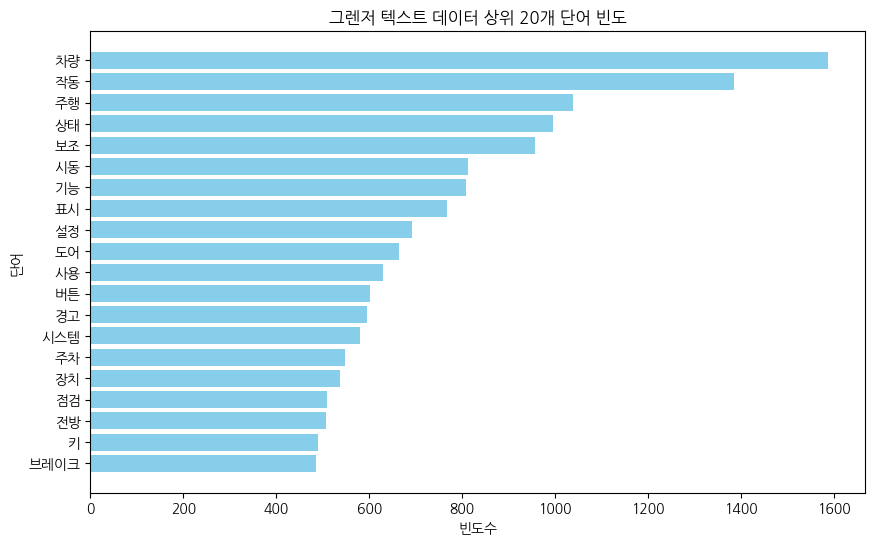

In [7]:
grandeur_top_words2 = grandeur_word_freq.most_common(20)
grandeur_top_words_dict2 = dict(grandeur_top_words2)
grandeur_words, grandeur_counts = zip(*grandeur_top_words2)# 단어와 빈도를 분리

plt.figure(figsize=(10, 6))
plt.barh(grandeur_words, grandeur_counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('그렌저 텍스트 데이터 상위 20개 단어 빈도')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 설정
plt.show()

## TF-IDF 기반 분석

차량: 27.6812
보조: 25.0965
작동: 23.0678
주행: 22.4219
표시: 18.3056
경고: 17.4577
설정: 17.1851
시동: 17.1265
도어: 16.9793
상태: 16.8333
전방: 16.7225
기능: 16.2125
타이어: 15.1788
점검: 15.1108
주차: 14.9729
버튼: 14.6815
충돌: 14.6333
좌석: 14.3224
엔진: 13.7889
시스템: 13.5239
브레이크: 13.2543
속도: 13.1757
스마트: 12.9525
차로: 12.6743
운전자: 12.6191
사용: 12.4966
장치: 12.4440
조절: 12.0404
운전: 11.8627
안전: 11.7656
클러스터: 11.6525
트렁크: 11.4984
주의: 11.2980
방지: 10.9623
센서: 10.8792
유리창: 10.8019
자동: 10.7883
에어백: 10.5532
후방: 10.0160
측방: 9.8685
해제: 9.6561
인식: 9.5807
페달: 9.4904
스티: 9.2895
정보: 9.1125
사항: 8.9721
스위치: 8.9647
고등: 8.9476
확인: 8.5984
변속: 8.4760


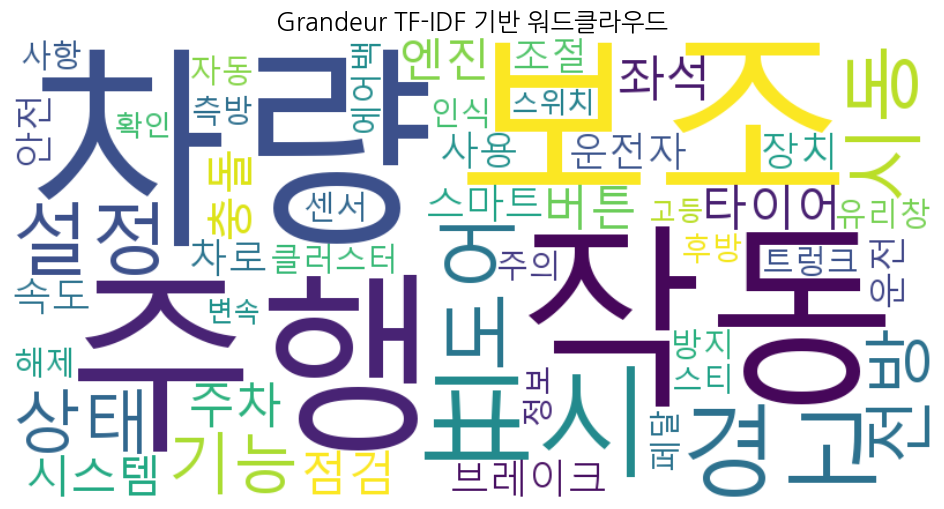

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서별로 띄어쓰기 기준으로 연결
grandeur_docs = [' '.join(tokens) for tokens in grandeur_filtered_tokens]

# 2. TF-IDF 벡터화
grandeur_vectorizer = TfidfVectorizer()
grandeur_X = grandeur_vectorizer.fit_transform(grandeur_docs)

# 3. 단어와 점수 추출
grandeur_words = grandeur_vectorizer.get_feature_names_out()
grandeur_scores = grandeur_X.sum(axis=0).A1  # 각 단어의 TF-IDF 점수 합계
grandeur_word_scores = dict(zip(grandeur_words, grandeur_scores))

grandeur_top_50 = sorted(grandeur_word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
for grandeur_word, grandeur_score in grandeur_top_50:
    print(f"{grandeur_word}: {grandeur_score:.4f}")
# 4. 워드클라우드 시각화
# top_50이 리스트 형태일 때 → dict로 변환
grandeur_top_50_dict = dict(grandeur_top_50)

# 워드클라우드 생성
grandeur_wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(grandeur_top_50_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(grandeur_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Grandeur TF-IDF 기반 워드클라우드", fontsize=18)
plt.show()


## 네트워크 그래프

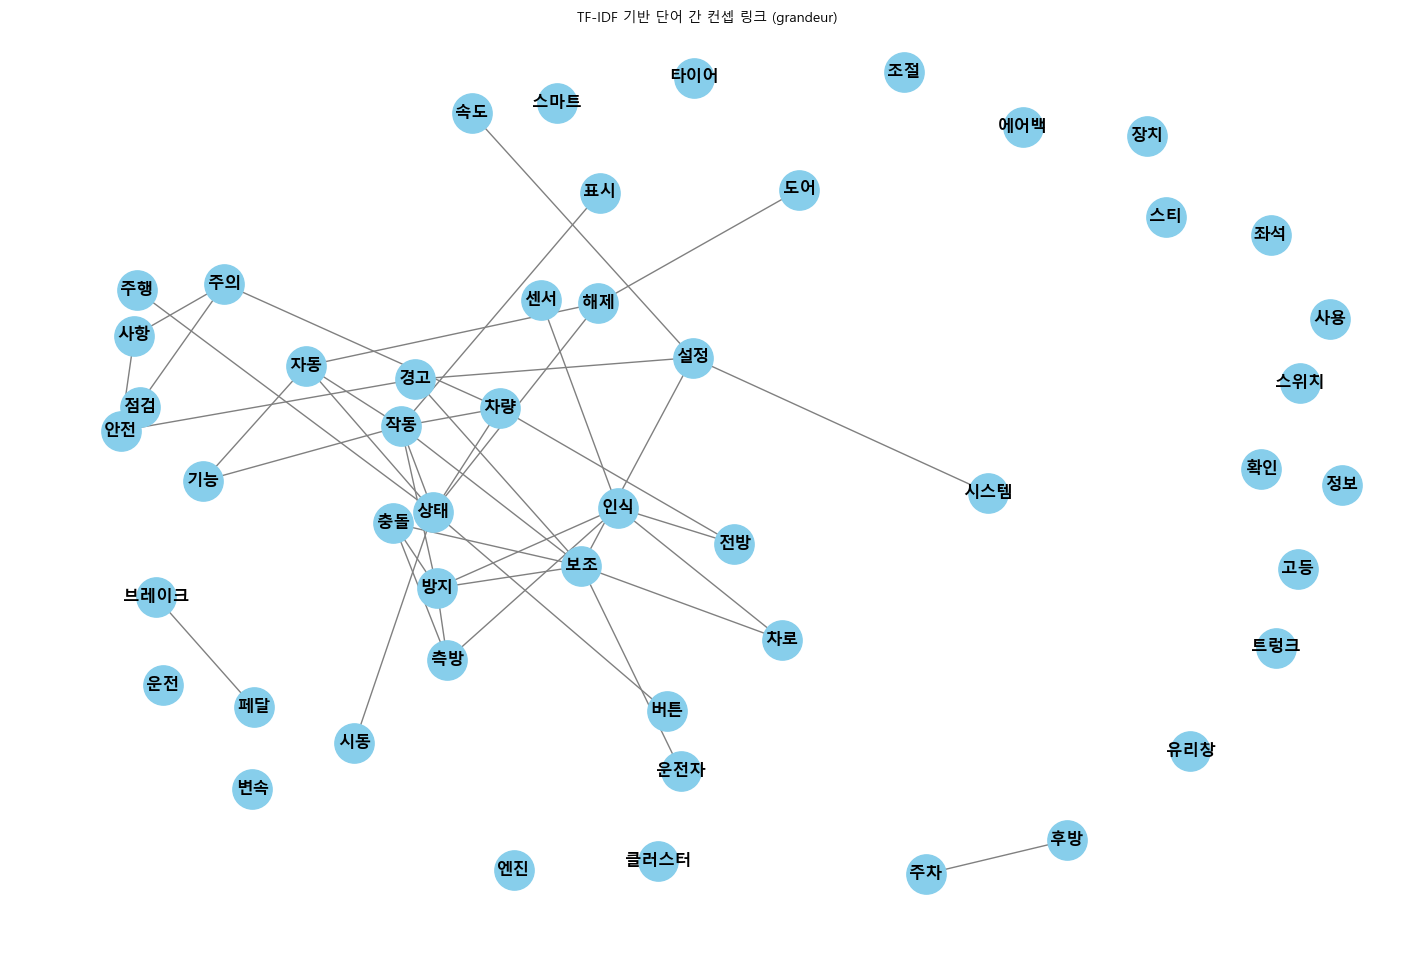

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. grandeur_top_50 단어 리스트와 인덱스 추출
grandeur_top_words = [word for word, score in grandeur_top_50]
grandeur_top_indices = [grandeur_vectorizer.vocabulary_[word] for word in grandeur_top_words]

# 2. 각 단어의 TF-IDF 벡터 추출 (문서 수 만큼 있는 벡터를 단어별로 전치)
grandeur_word_vectors = grandeur_X[:, grandeur_top_indices].T.toarray()  # shape: (50, num_docs)

# 3. 단어 간 코사인 유사도 계산
grandeur_similarity_matrix = cosine_similarity(grandeur_word_vectors)

# 4. 네트워크 그래프 생성
grandeur_G = nx.Graph()

# 노드 추가
for word in grandeur_top_words:
    grandeur_G.add_node(word)

# 엣지 추가 (유사도 임계값 이상일 때만)
grandeur_threshold = 0.4  # 유사도 기준 (필요에 따라 조절 가능)
for i in range(len(grandeur_top_words)):
    for j in range(i + 1, len(grandeur_top_words)):
        sim = grandeur_similarity_matrix[i][j]
        if sim >= grandeur_threshold:
            grandeur_G.add_edge(grandeur_top_words[i], grandeur_top_words[j], weight=sim)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 말굽 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(18, 12))
grandeur_pos = nx.spring_layout(grandeur_G, k=0.5, seed=42)
nx.draw_networkx_nodes(grandeur_G, grandeur_pos, node_color='skyblue', node_size=800)

# ✅ 한글 폰트 설정: font_family에 폰트 이름 넣기
nx.draw_networkx_labels(
    grandeur_G, grandeur_pos,
    font_size=12,
    font_weight='bold',
    font_family=font_prop.get_name()
)

nx.draw_networkx_edges(grandeur_G, grandeur_pos, edge_color='gray')

# 제목에도 폰트 적용하고 싶다면:
plt.title("TF-IDF 기반 단어 간 컨셉 링크 (grandeur)", fontsize=50, fontproperties=font_prop)
plt.axis('off')
plt.show()


## 청크 오류 확인

In [10]:
# 조사로 끝나는 text 청크 확인
import re

def is_cut_off(text):
    return bool(re.search(r'(는|가|을|를|에|으로|에게|와|과)$', text.strip()))

grandeur['cut_off'] = grandeur['text'].apply(is_cut_off)
grandeur_cut = grandeur[grandeur['cut_off']]
print(grandeur_cut[['text']])

Empty DataFrame
Columns: [text]
Index: []


In [11]:
# 특수기호로 시작하는 청크 확인
# '-', '*', ',', '.' 로 시작하는 텍스트 필터링
special_start = grandeur[grandeur['text'].str.match(r'^[-\*,\.]')]

# 결과 확인
print(special_start[['text']])


Empty DataFrame
Columns: [text]
Index: []


In [12]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()

# 1. KoGPT 불러오기
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
model.eval()

# 2. Perplexity 계산 함수
def get_perplexity(text):
    try:
        if len(text) < 100:  # 100자 미만은 계산 안 함
            return np.nan
        encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
        return np.exp(loss.item())
    except:
        return np.nan

# 3. 전체 텍스트에 대해 perplexity 계산 (100자 이상만)
grandeur['perplexity'] = grandeur['text'].progress_apply(get_perplexity)

# 4. Perplexity 기준 상위 10개 출력 (문제가 의심되는 문장)
problematic_texts = grandeur.sort_values(by='perplexity', ascending=False).head(10)
print(problematic_texts[['text', 'perplexity']])


c:\Users\jeongbin\Projects\hyundai_reg_bot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
100%|██████████| 562/562 [09:33<00:00,  1.02s/it]

                                                  text  perplexity
12   (제30조의3제1항 관련)\n의 작동 여부)를 저장하고, 저장된 정보를 확인할 수 ...  202.720877
89   차량 내 가죽 제품의 특성\n•\n차량에 장착된 천연 가죽 재질은 부위별 두께나 밀...  173.386516
548  9\n안전벨트의 청소\n내장재 또는 카펫용으로 추천된 부드러운 비누액을 사용하여 안...  136.406045
76   창문 밖으로 손 또는 얼굴 내밀기 금지\n창문 밖으로 손이나 얼굴 등을 내밀지 마십...  117.255876
288  선바이저\n2C_Sunvisor\n전면 또는 측면의 유리창을 통해 들어오는 직사광선...  108.633278
474  8\n설치 방법\n2C_HowToInstallTripod\n케이스에서 고장 자동차 ...  103.269243
264  5\n•\n동절기에는 서리제거 장치 등으로 유리창을 따뜻하게 한 뒤에 와셔액을 사용...   98.928376
189  후석 승객 알림 시스템\n뒷좌석에 탑승자를 두고 내리는 것을 방지하기 위한 시스템입...   96.234481
66   2\n클러스터 각종 정보의 이상 유무를 확인하고 연료량이 충분한지 점검하십시오.\n...   95.964807
69   운전석 주변 점검\n•\n운전석 주변은 항상 깨끗하게 유지하십시오. 빈 깡통 등이 ...   91.849304


In [3]:
a=[12,89,548,76,288,474]
for i in (a):
    print(grandeur.loc[i,'text'])
    print('='*50)

(제30조의3제1항 관련)
의 작동 여부)를 저장하고, 저장된 정보를 확인할 수 있는
기능을 하는 장치를 말합니다.
사고기록정보는 사고 상황을 파악하는 데 도움이 되는 정
보를 제공합니다.
차량 내 가죽 제품의 특성
•
차량에 장착된 천연 가죽 재질은 부위별 두께나 밀도 특성이 다르며, 온도와 습도에 따라 늘어
나거나 줄어들면서 주름이 생길 수 있습니다. 이는 자연스러운 현상이며 결함에 의한 불량이 아
닙니다.
•
시간이 지나면서 발생하는 가죽의 광택과 질감 변화는 자연스러운 현상이며 결함에 의한 불량
이 아닙니다.
33
9
안전벨트의 청소
내장재 또는 카펫용으로 추천된 부드러운 비누액을 사용하여 안전벨트를 청소하십시오. 표백처리
를 하거나 재염색을 하지 마십시오.
내부 창문의 청소
기름기, 왁스 성분 등 때문에 창문 안쪽 표면에 서리가 끼면 창문 세척기로 닦으십시오.
뒷유리창 안쪽을 심하게 닦거나 긁지 마십시오. 뒷유리창 서리 제거 장치(열선) 등이 손상될 수 있
습니다.
697
정기 점검
창문 밖으로 손 또는 얼굴 내밀기 금지
창문 밖으로 손이나 얼굴 등을 내밀지 마십시오. 대단히 위험합니다. 특히, 어린이와 함께 탈 경우 는 항상 주의하십시오.
30
안전 및 주의 사항
선바이저
2C_Sunvisor
전면 또는 측면의 유리창을 통해 들어오는 직사광선을 차단할 때 사용하십시오. 선바이저를 사용
하려면 당겨 내리십시오.
측면을 차단하고자 할 때는 선바이저 끝을 당겨 내린 후 브래킷(1)에서 분리하여 측면으로 돌리십
시오(2).
선바이저 안쪽의 커버(3)를 밀면 거울이 있습니다.
차량에 따라 선바이저(4)를 앞뒤로 움직일 수 있습니다. 운전석 선바이저 안쪽에는 고속도로 통행
권 등을 끼울 수 있는 티켓 홀더(5)가 있습니다.
316
8
설치 방법
2C_HowToInstallTripod
케이스에서 고장 자동차 정지 표지판(안전 삼각대)을 꺼내 좌우 날개를 올려 삼각형으로 맞춘 후
서로 교차하게 연결 홈에 고정하십시오.
고장 자동차 정지 표지판(안전 삼각대) 아래쪽

# 괜찮은듯?

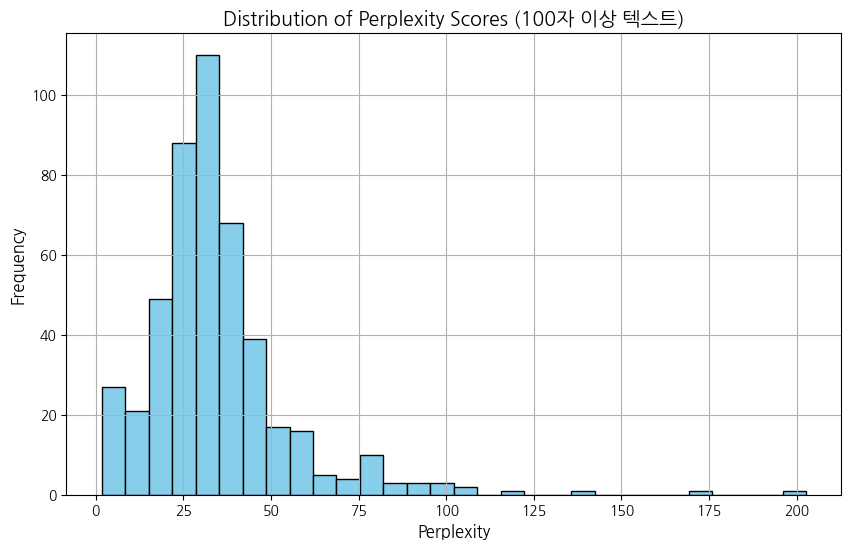

In [13]:
import matplotlib.pyplot as plt

# NaN 제거
valid_perplexities = grandeur['perplexity'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(valid_perplexities, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Perplexity Scores (100자 이상 텍스트)', fontsize=14)
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()
